In [59]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [60]:
np.set_printoptions(precision=3)

In [61]:
diabetes = pd.read_csv(os.path.join('datasets', 'data-prep', 'diabetes_processed.csv'))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [62]:
features_df = diabetes.drop(['Outcome'], axis=1)
label_df = diabetes[['Outcome']]
features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [63]:
features_df.shape

(768, 8)

In [64]:
features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.994792,152.815064,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096346,8.886506,97.206638,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,-16.568152,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,89.976015,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,32.000000,131.100779,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,189.857469,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Min Max Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
rescaled_features = scaler.fit_transform(features_df)
rescaled_features_df = pd.DataFrame(rescaled_features, columns=features_df.columns) #Numpy array
rescaled_features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493930,0.249943,0.196371,0.291430,0.168179,0.204015
std,0.198210,0.196376,0.123432,0.096592,0.112694,0.140601,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.123520,0.190184,0.070773,0.050000
50%,0.176471,0.470968,0.491863,0.271739,0.171197,0.282209,0.125747,0.133333
75%,0.352941,0.620968,0.571429,0.271739,0.239315,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


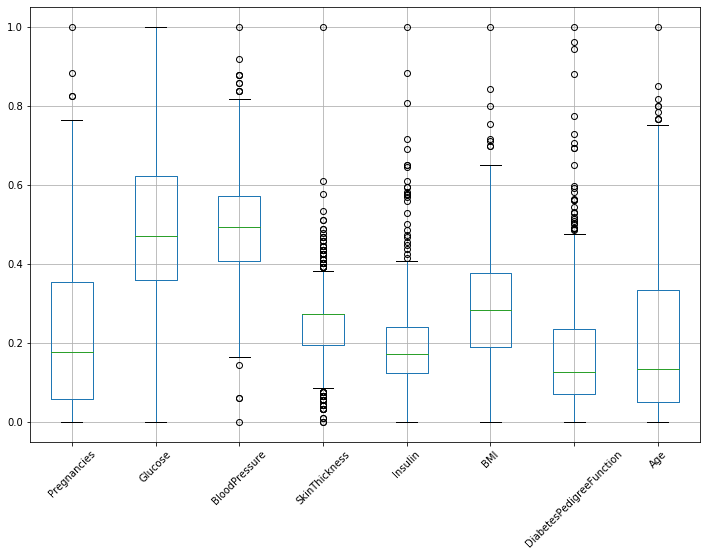

In [66]:
rescaled_features_df.boxplot(figsize=(12,8), rot=45)
plt.show() #Very sentitive to outliers

### Standardization

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_features = scaler.fit_transform(features_df)
standardized_features_df = pd.DataFrame(standardized_features, columns=features_df.columns)
standardized_features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,7.661695e-18,-4.474864e-16,3.850725e-17,4.756034e-17,4.803738e-16,2.491497e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.004245e+00,-2.589294e+00,-1.743642e+00,-2.074100e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.953060e-01,-5.624310e-01,-6.468694e-01,-7.205635e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-1.675912e-02,2.257935e-01,-2.235283e-01,-6.562636e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.282695e-01,2.257935e-01,3.813170e-01,6.038649e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.102655e+00,7.770228e+00,7.135692e+00,5.042883e+00,5.883565e+00,4.063716e+00


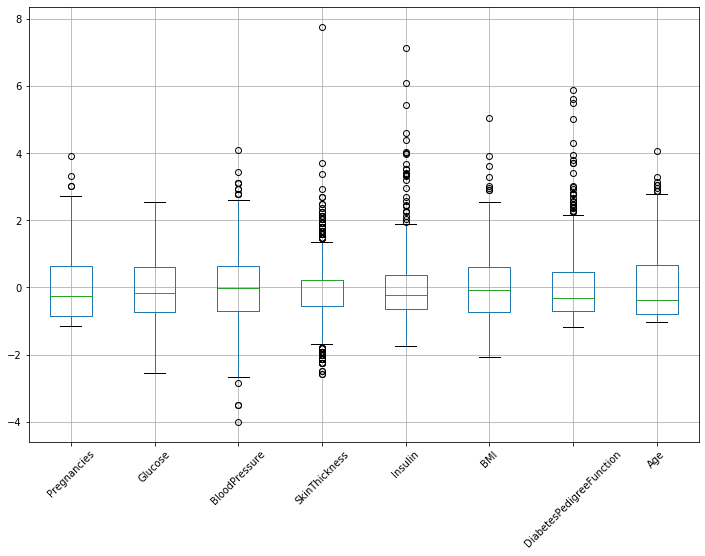

In [68]:
standardized_features_df.boxplot(figsize=(12,8), rot=45)
plt.show()

### Normalization

In [87]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l1') #Every row is a featured vector of unit magnitude
normalized_features = normalizer.fit_transform(features_df)
normalized_features_df1 = pd.DataFrame(normalized_features, columns=features_df.columns)
normalized_features_df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.010633,0.262293,0.127602,0.062029,0.388172,0.059548,0.001111,0.088612
1,0.003233,0.274821,0.213390,0.093762,0.227427,0.086003,0.001135,0.100229
2,0.013039,0.298267,0.104312,0.052156,0.441000,0.037976,0.001095,0.052156
3,0.003103,0.276169,0.204799,0.071369,0.291684,0.087195,0.000518,0.065163
4,0.000000,0.298873,0.087262,0.076355,0.366502,0.094025,0.004991,0.071991


In [88]:
normalized_features_df1.iloc[0].abs().sum()

1.0

In [89]:
normalized_features_df1.iloc[0]

Pregnancies                 0.010633
Glucose                     0.262293
BloodPressure               0.127602
SkinThickness               0.062029
Insulin                     0.388172
BMI                         0.059548
DiabetesPedigreeFunction    0.001111
Age                         0.088612
Name: 0, dtype: float64

In [91]:
## L2 Norm
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l2')
normalized_features = normalizer.fit_transform(features_df)
normalized_features_df2 = pd.DataFrame(normalized_features, columns=features_df.columns)
normalized_features_df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.021220,0.523417,0.254635,0.123781,0.774616,0.118830,0.002217,0.176830
1,0.007247,0.616013,0.478316,0.210169,0.509780,0.192776,0.002544,0.224664
2,0.023751,0.543311,0.190010,0.095005,0.803308,0.069176,0.001995,0.095005
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [93]:
normalized_features_df2.iloc[0].pow(2).sum()

1.0

In [94]:
## Max Norm
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='max') # One feature in every record will be equal to one. (max one)
normalized_features = normalizer.fit_transform(features_df)
normalized_features_df_max = pd.DataFrame(normalized_features, columns=features_df.columns)
normalized_features_df_max.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.027394,0.675711,0.328724,0.159797,1.000000,0.153405,0.002863,0.228281
1,0.011765,1.000000,0.776471,0.341176,0.827548,0.312941,0.004129,0.364706
2,0.029567,0.676342,0.236535,0.118267,1.000000,0.086113,0.002484,0.118267
3,0.010638,0.946809,0.702128,0.244681,1.000000,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.000000,0.256548,0.013619,0.196429


### Binarizer

In [77]:
### Converts the features in 1,0 form. Eg. all values greater than mean 1, smaller than 0
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=float(features_df[['Pregnancies']].mean()))
binarizerd_features = binarizer.fit_transform(features_df[['Pregnancies']])
binarizerd_features[0:5]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [78]:
binarizer

Binarizer(copy=True, threshold=3.8450520833333335)

In [79]:
features_df[['Pregnancies']].head()

,Pregnancies
0,6.0
1,1.0
2,8.0
3,1.0
4,0.0


In [80]:
# applyting this feature to all values
from sklearn.preprocessing import Binarizer

for i in range(1,features_df.shape[1]):
    binarizer = Binarizer(threshold=float(features_df[[features_df.columns[i]]].mean()))
    new_binarizerd_features = binarizer.fit_transform(features_df[[features_df.columns[i]]])
    binarizerd_features = np.concatenate((binarizerd_features,new_binarizerd_features),axis=1)

In [81]:
binarizerd_features_df = pd.DataFrame(binarizerd_features, columns=features_df.columns)
binarizerd_features_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


### Logistic Regression Model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [83]:
def build_model(X, Y, test_frac):
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=test_frac)
    model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Test Score: ', accuracy_score(y_test, y_pred))

In [85]:
build_model(rescaled_features, label_df, 0.2)

Test Score:  0.7467532467532467


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
build_model(standardized_features, label_df, 0.2)

Test Score:  0.7857142857142857


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
build_model(normalized_features_df1, label_df, 0.2)

Test Score:  0.6558441558441559


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
build_model(normalized_features_df2, label_df, 0.2)

Test Score:  0.5909090909090909


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
build_model(normalized_features_df_max, label_df, 0.2)

Test Score:  0.6753246753246753


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
build_model(binarizerd_features, label_df, 0.2)

Test Score:  0.6883116883116883


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
